In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('D:\Analytics_vidya_/train_2kmZucJ.csv')
df.shape

(7920, 3)

In [3]:
df.head()

,medical_specialty,transcription
0,Orthopedic,"TITLE OF OPERATION: , Youngswick osteotomy wit..."
1,Orthopedic,"PREOPERATIVE DIAGNOSES:,1. Hallux rigidus, le..."
2,Orthopedic,"CHIEF COMPLAINT:, Left wrist pain.,HISTORY OF..."
3,Orthopedic,"PREOPERATIVE DIAGNOSIS: , Wrist ganglion.,POST..."
4,Orthopedic,"PREOPERATIVE DIAGNOSIS:, T11 compression frac..."


In [4]:
## shuffling the dataset
from sklearn.utils import shuffle
df = shuffle(df)

In [5]:
df.head(10)

,medical_specialty,transcription
1316,Consult - History and Phy.,Patient had a normal MRI and normal neurologic...
389,Surgery,"PREOPERATIVE DIAGNOSES:,1. Thrombosed left fo..."
585,Surgery,"OPERATIVE NOTE: ,The patient was placed in th..."
750,Surgery,"PREOPERATIVE DIAGNOSES: , Malnutrition and dys..."
1662,Consult - History and Phy.,"INTERVAL HISTORY:, ABC who is 10 years of age..."
593,Surgery,"PREOPERATIVE DIAGNOSES:,1. Intrauterine pregn..."
713,Surgery,"OPERATION PERFORMED:, Full mouth dental rehab..."
24,Orthopedic,"PREOPERATIVE DIAGNOSES:,1. Painful enlarged n..."
1570,Consult - History and Phy.,"HISTORY OF PRESENT ILLNESS: , This is a 76-yea..."
1366,Consult - History and Phy.,"HISTORY OF PRESENT ILLNESS: , This 40-year-old..."


In [6]:
df.medical_specialty.value_counts()

 Surgery                       664
 Consult - History and Phy.    465
 Cardiovascular / Pulmonary    318
 Orthopedic                    316
Name: medical_specialty, dtype: int64

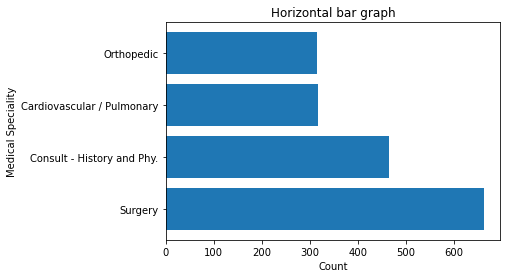

In [7]:
y=['Surgery', 'Consult - History and Phy.','Cardiovascular / Pulmonary', 'Orthopedic']
x=[664,465,318,316]

plt.barh(y, x)
plt.xlabel("Count")
plt.ylabel("Medical Speciality")
plt.title("Horizontal bar graph")
plt.show()

In [8]:
df = df.dropna(axis=0, subset=['transcription'])


In [9]:
df

,medical_specialty,transcription
1316,Consult - History and Phy.,Patient had a normal MRI and normal neurologic...
389,Surgery,"PREOPERATIVE DIAGNOSES:,1. Thrombosed left fo..."
585,Surgery,"OPERATIVE NOTE: ,The patient was placed in th..."
750,Surgery,"PREOPERATIVE DIAGNOSES: , Malnutrition and dys..."
1662,Consult - History and Phy.,"INTERVAL HISTORY:, ABC who is 10 years of age..."
...,...,...
576,Surgery,"PREOPERATIVE DIAGNOSIS: , Right profound mixed..."
70,Orthopedic,"PREOPERATIVE DIAGNOSIS: , Left distal radius f..."
995,Cardiovascular / Pulmonary,"PROCEDURE NOTE:, The patient was brought to t..."
1620,Consult - History and Phy.,"CHIEF COMPLAINT:, Questionable foreign body, ..."


In [10]:
df.medical_specialty.value_counts()

 Surgery                       664
 Consult - History and Phy.    465
 Cardiovascular / Pulmonary    318
 Orthopedic                    316
Name: medical_specialty, dtype: int64

In [11]:
df.transcription.isnull().value_counts()

False    1763
Name: transcription, dtype: int64

In [12]:
df.shape

(1763, 2)

In [13]:
df['medical_specialty'] = df['medical_specialty'].astype('category')

In [14]:
df["medical_specialty_cat"] = df["medical_specialty"].cat.codes

In [15]:
messages = df.transcription.tolist()

In [16]:
########## finding map class to integer value #############
class0 = df[df.medical_specialty_cat == 0].iloc[0].medical_specialty
class1 = df[df.medical_specialty_cat == 1].iloc[0].medical_specialty
class2 = df[df.medical_specialty_cat == 2].iloc[0].medical_specialty
class3 = df[df.medical_specialty_cat == 3].iloc[0].medical_specialty
classes = {0 : class0, 1 : class1, 2 : class2, 3 : class3}

In [17]:
classes

{0: ' Cardiovascular / Pulmonary',
 1: ' Consult - History and Phy.',
 2: ' Orthopedic',
 3: ' Surgery'}

In [18]:
#Data cleaning and preprocessing
import re
import nltk
# nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()
corpus = []

for i in range(0, len(messages)):
    message = re.sub('[^a-zA-Z]', ' ', str(messages[i]))
    message = message.lower()
    message = message.split()
    
    message = [lemmatizer.lemmatize(word) for word in message if not word in stopwords.words('english')]
    message = ' '.join(message)
    corpus.append(message)

In [19]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer = vectorizer.fit(corpus)
X = vectorizer.transform(corpus).toarray()

In [20]:
X.shape

(1763, 16759)

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_P = pca.fit_transform(X)


In [22]:
X_P.shape

(1763, 1339)

In [25]:
classes

{0: ' Cardiovascular / Pulmonary',
 1: ' Consult - History and Phy.',
 2: ' Orthopedic',
 3: ' Surgery'}

#I recommend you that don't use Naive Bayes with SVD or other matrix factorization because Naive Bayes based on applying Bayes' theorem with strong (naive) independence assumptions between the features. 

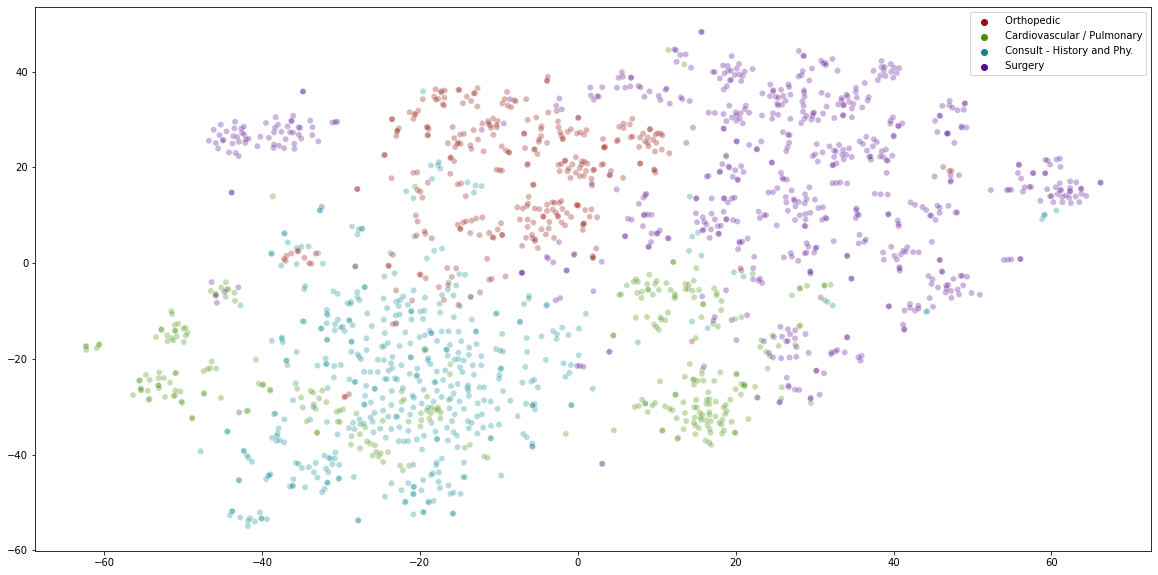

In [28]:
from sklearn.manifold import TSNE
import seaborn as sns
labels = df["medical_specialty"].to_list()
tsne_results = TSNE(n_components=2,init='random',random_state=0, perplexity=40).fit_transform(X_P)
plt.figure(figsize=(20,10))
palette = sns.hls_palette(4, l=.3, s=.9)
sns.scatterplot(
    x=tsne_results[:,0], y=tsne_results[:,1],
    hue=labels,
    palette= palette,
    legend="full",
    alpha=0.3
)
plt.show()

In [29]:
y = df["medical_specialty"].cat.codes

In [36]:
# Train Test Split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_train_N, X_test_N, y_train_N, y_test_N = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [37]:
# Train Test Split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_P, y, test_size = 0.20, random_state = 0)

In [38]:
X_train.shape

(1410, 1339)

In [39]:
X_train_N.shape

(1410, 16759)

In [40]:
sm = SMOTE(random_state=2)
X_train_N, y_train_N = sm.fit_resample(X_train_N, y_train_N.ravel())


In [41]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))

Before SMOTE : Counter({3: 549, 1: 367, 2: 255, 0: 239})


In [42]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [43]:
print("After SMOTE :" , Counter(y_train))

After SMOTE : Counter({2: 549, 3: 549, 1: 549, 0: 549})


In [ ]:
from collections import Counter
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))

In [224]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [120]:
################# NB Classifier
NB_model = MultinomialNB().fit(X_train_N, y_train_N)

In [122]:
naive_bayes_prediction = NB_model.predict(X_test_N)

In [123]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(classification_report(y_test,naive_bayes_prediction))

              precision    recall  f1-score   support

           0       0.97      0.76      0.85        74
           1       0.78      0.98      0.86        82
           2       0.87      0.83      0.85        63
           3       0.95      0.93      0.94       134

    accuracy                           0.89       353
   macro avg       0.89      0.87      0.87       353
weighted avg       0.90      0.89      0.89       353



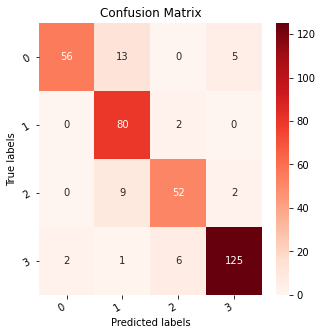

In [124]:
import seaborn as sns
labels = classes
cm = confusion_matrix(y_test, naive_bayes_prediction)

fig = plt.figure(figsize=(5,5))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Reds",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

In [125]:
################# SVC Classifier
SVC_model = SVC().fit(X_train, y_train)

In [126]:
SVC_prediction = SVC_model.predict(X_test)

In [127]:
print(classification_report(y_test,SVC_prediction))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88        74
           1       0.89      0.98      0.93        82
           2       0.96      0.84      0.90        63
           3       0.90      0.98      0.94       134

    accuracy                           0.92       353
   macro avg       0.93      0.90      0.91       353
weighted avg       0.92      0.92      0.92       353



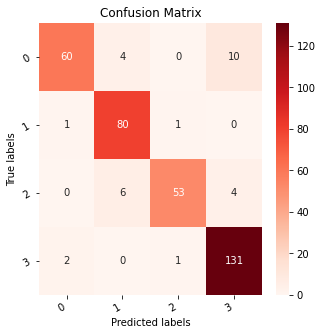

In [128]:
labels = classes
cm = confusion_matrix(y_test, SVC_prediction)

fig = plt.figure(figsize=(5,5))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Reds",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

In [129]:
################# KNN Classifier
KNN_model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
KNN_prediction = KNN_model.predict(X_test)
print(classification_report(y_test,KNN_prediction))

              precision    recall  f1-score   support

           0       0.68      0.93      0.78        74
           1       0.85      0.71      0.77        82
           2       0.61      0.94      0.74        63
           3       0.97      0.62      0.75       134

    accuracy                           0.76       353
   macro avg       0.78      0.80      0.76       353
weighted avg       0.81      0.76      0.76       353



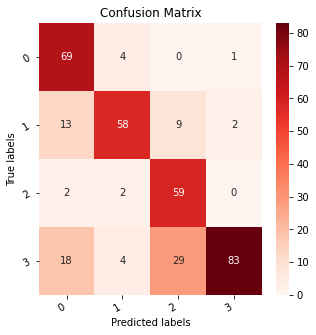

In [130]:
labels = classes
cm = confusion_matrix(y_test, KNN_prediction)

fig = plt.figure(figsize=(5,5))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Reds",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

In [131]:
################# DecisionTree Classifier
DecisionTree_model = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
decisionTree_prediction = DecisionTree_model.predict(X_test)
print(classification_report(y_test,decisionTree_prediction))

              precision    recall  f1-score   support

           0       0.81      0.64      0.71        74
           1       0.80      0.87      0.83        82
           2       0.83      0.87      0.85        63
           3       0.86      0.90      0.88       134

    accuracy                           0.83       353
   macro avg       0.83      0.82      0.82       353
weighted avg       0.83      0.83      0.83       353



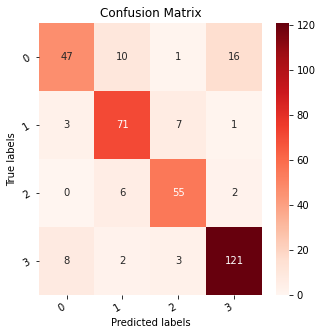

In [132]:
labels = classes
cm = confusion_matrix(y_test, decisionTree_prediction)

fig = plt.figure(figsize=(5,5))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Reds",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

In [133]:
################# Random forest Classifier
RandomForest_model=RandomForestClassifier(n_estimators=100).fit(X_train,y_train)
random_forest_prediction=RandomForest_model.predict(X_test)
print(classification_report(y_test,random_forest_prediction))

              precision    recall  f1-score   support

           0       0.92      0.64      0.75        74
           1       0.79      0.90      0.84        82
           2       0.86      0.78      0.82        63
           3       0.84      0.95      0.89       134

    accuracy                           0.84       353
   macro avg       0.85      0.82      0.83       353
weighted avg       0.85      0.84      0.84       353



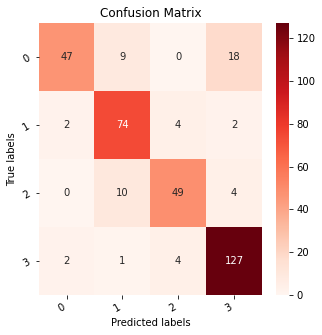

In [134]:
labels = classes
cm = confusion_matrix(y_test, random_forest_prediction)

fig = plt.figure(figsize=(5,5))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Reds",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

In [225]:
#################LogisticRegression Classifier
LogisticRegression_model = LogisticRegression(multi_class='ovr', solver='liblinear', C=10.0, random_state=0).fit(X_train,y_train)
LogisticRegression_prediction = LogisticRegression_model.predict(X_test)
print(classification_report(y_test,LogisticRegression_prediction))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        74
           1       0.92      0.93      0.92        97
           2       0.84      0.94      0.89        52
           3       0.94      0.95      0.94       130

    accuracy                           0.92       353
   macro avg       0.91      0.91      0.91       353
weighted avg       0.92      0.92      0.91       353



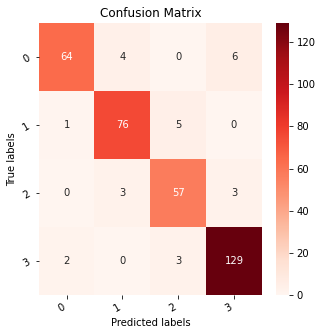

In [136]:
labels = classes
cm = confusion_matrix(y_test, LogisticRegression_prediction)

fig = plt.figure(figsize=(5,5))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Reds",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
GBC_prediction = model.predict(X_test)

In [48]:
print(classification_report(y_test,GBC_prediction))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83        74
           1       0.87      0.91      0.89        82
           2       0.90      0.84      0.87        63
           3       0.90      0.96      0.93       134

    accuracy                           0.89       353
   macro avg       0.89      0.88      0.88       353
weighted avg       0.89      0.89      0.89       353



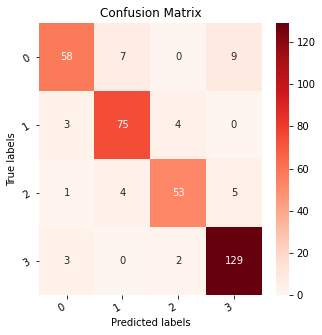

In [49]:
labels = classes
cm = confusion_matrix(y_test, GBC_prediction)

fig = plt.figure(figsize=(5,5))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Reds",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()

In [50]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)
XGB_prediction = model.predict(X_test)

[10:17:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [51]:
print(classification_report(y_test,XGB_prediction))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        74
           1       0.88      0.90      0.89        82
           2       0.87      0.86      0.86        63
           3       0.90      0.95      0.92       134

    accuracy                           0.89       353
   macro avg       0.89      0.88      0.88       353
weighted avg       0.89      0.89      0.89       353



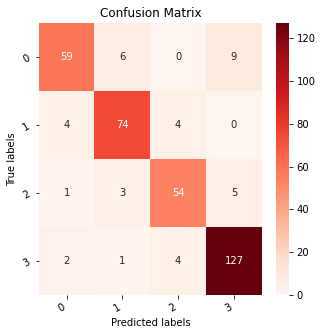

In [52]:
labels = classes
cm = confusion_matrix(y_test, XGB_prediction)

fig = plt.figure(figsize=(5,5))
ax= fig.add_subplot(1,1,1)
sns.heatmap(cm, annot=True, cmap="Reds",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')     
plt.show()